In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [6]:
fruits=pd.read_table('Data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
fruits.shape

(59, 7)

In [11]:
#using dictionary to map fruit label valu to fruit name
look_up_fruit_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [12]:
#split the data into training and testing
X=fruits[['mass','width','height','color_score']]
y=fruits['fruit_label']
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

/Users/jingchen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


<IPython.core.display.Javascript object>


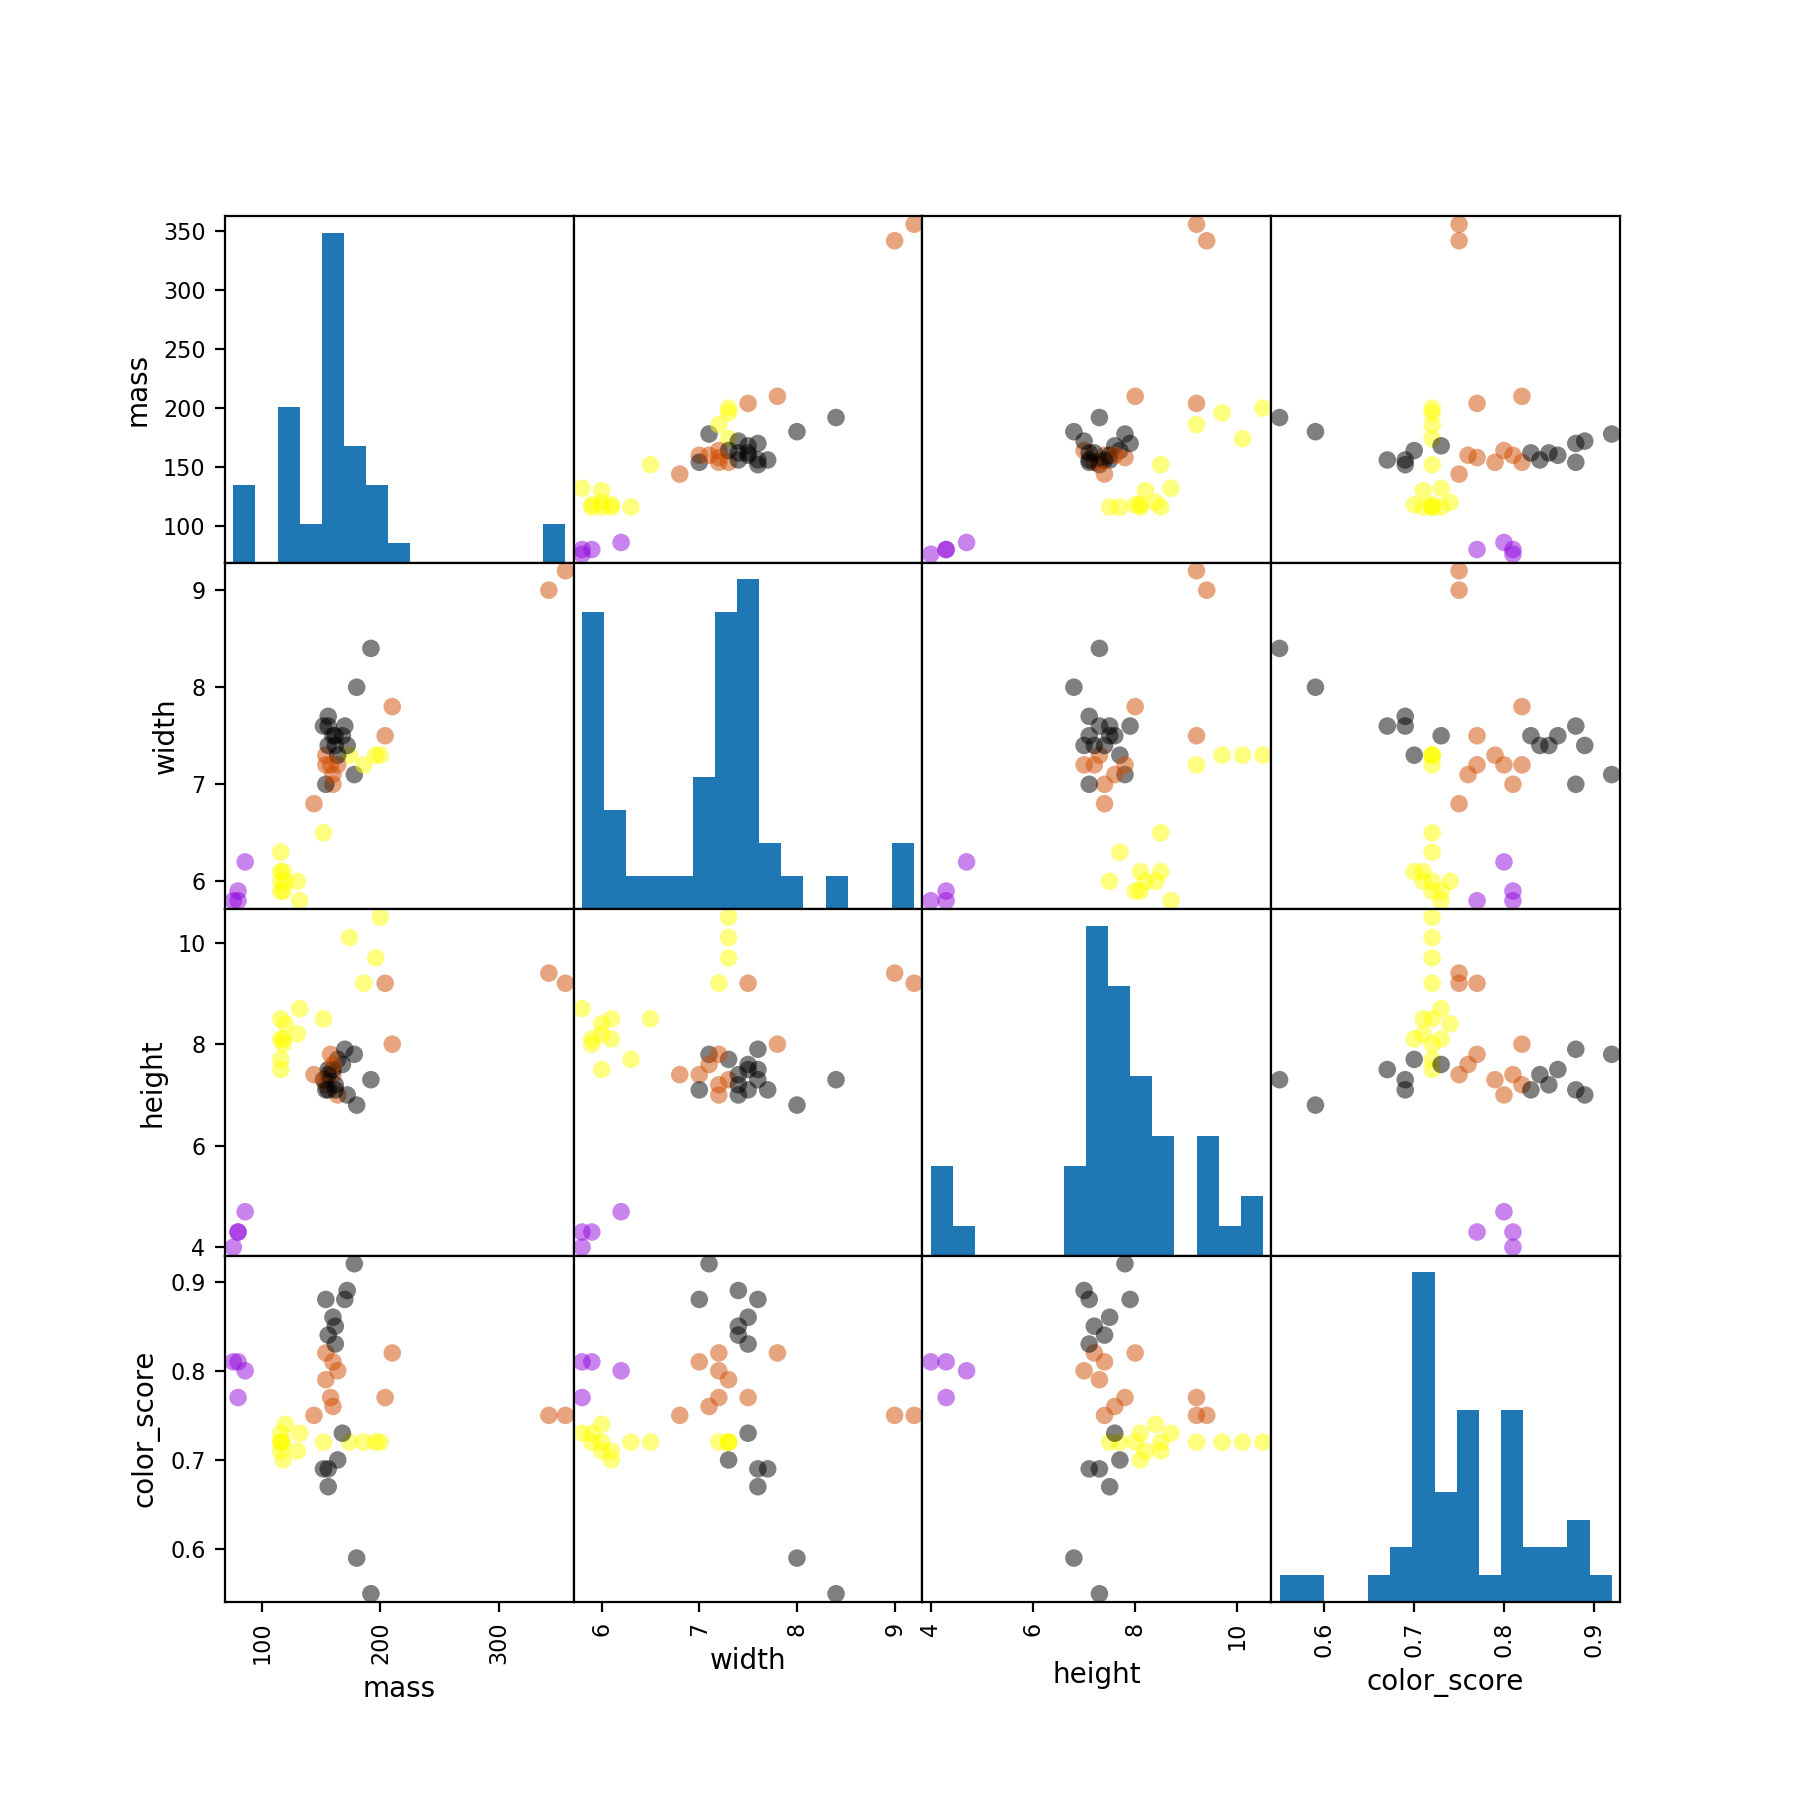

In [14]:
#plotting a scatter matrix
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
scatter=pd.scatter_matrix(X_train, c=y_train, marker='o', s=40, 
                          hist_kwds={'bins':15}, figsize=(9,9),cmap=cmap)

<IPython.core.display.Javascript object>


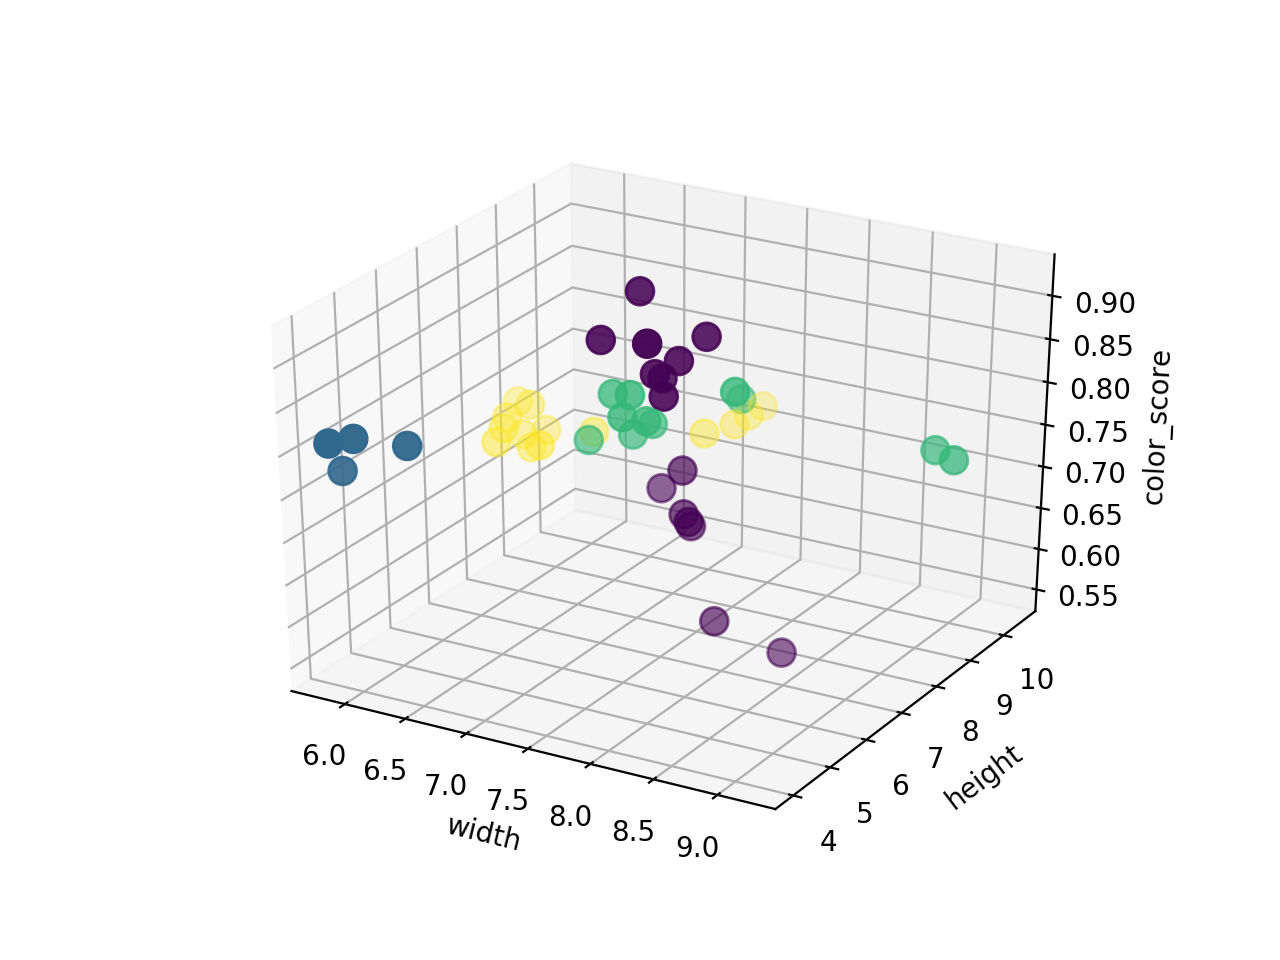

In [18]:
#plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [19]:
X=fruits[['mass','width','height']]
y=fruits['fruit_label']
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [20]:
#create classification object
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [21]:
#train the classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
# estimate the accuracy of the classifier on future data, suing the test data
knn.score(X_test, y_test)

0.5333333333333333

In [23]:
# USe the trained k_NN classifier mode lt oclassify new, previously unseen objects
#first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction=knn.predict([20, 4.3, 5.5])
look_up_fruit_name[fruit_prediction[0]]

/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'mandarin'

In [24]:
fruit_prediction=knn.predict([100, 6.3, 7.5])
look_up_fruit_name[fruit_prediction[0]]

/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'lemon'

<IPython.core.display.Javascript object>


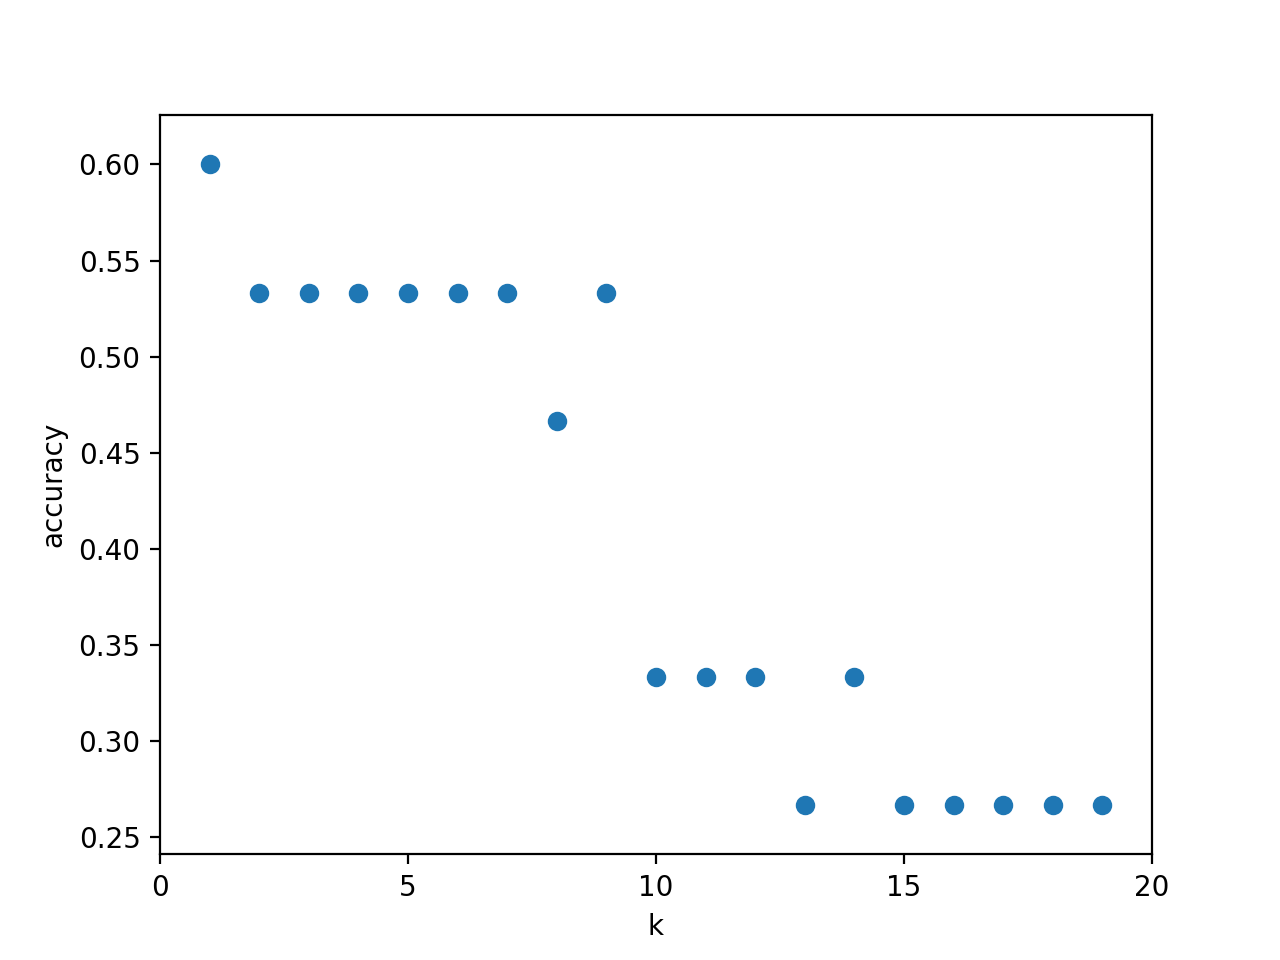

([<matplotlib.axis.XTick at 0x118b0fbd0>,
 <a list of 5 Text xticklabel objects>)

In [35]:
# How sensitive is k_NN classification accuracy to the choice of the 'k' parameter
k_range=range(1,20)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])